In [3]:
def svd(img_arr, k):
    img_arr_R = img_arr[:, :, 0]
    u_R, s_R, v_R = np.linalg.svd(img_arr_R)
    
    img_arr_G = img_arr[:, :, 1]
    u_G, s_G, v_G = np.linalg.svd(img_arr_G)
    
    img_arr_B = img_arr[:, :, 2]
    u_B, s_B, v_B = np.linalg.svd(img_arr_B)

    temp_arr_R = u_R[:, :k] @ np.diag(s_R[:k]) @ v_R[:k, :]
    temp_arr_G = u_G[:, :k] @ np.diag(s_G[:k]) @ v_G[:k, :]
    temp_arr_B = u_B[:, :k] @ np.diag(s_B[:k]) @ v_B[:k, :]
    
    temp_arr = np.zeros([2048, 2048, 3])
    temp_arr[:, :, 0] = temp_arr_R
    temp_arr[:, :, 1] = temp_arr_G
    temp_arr[:, :, 2] = temp_arr_B

    return temp_arr, np.concatenate([u_R[:, :k].flatten(), s_R[:k], v_R[:k, :].flatten(), u_G[:, :k].flatten(), s_G[:k], v_G[:k, :].flatten(), u_B[:, :k].flatten(), s_B[:k], v_B[:k, :].flatten()])

In [2]:
import numpy as np
from PIL import Image
ai_arr = []
for i in range(1, 51):
    img = Image.open('Processed/Ai/' + str(i) + '.jpg')
    _, temp_ai_arr = svd(np.array(img), 48)
    ai_arr.append(temp_ai_arr)
print(len(ai_arr), len(ai_arr[0]))
ai_arr = np.array(ai_arr).reshape([50, 589968])
ai_arr = ai_arr.tolist()
for i in range(50):
    ai_arr[i].append(0)
print(len(ai_arr), len(ai_arr[0]))
print(ai_arr[0][-1])

50 589968
50 589969
0


In [3]:
import numpy as np
from PIL import Image
real_arr = []
for i in range(1, 70):
    img = Image.open('Processed/Real/' + str(i) + '.jpg')
    _, temp_real_arr = svd(np.array(img)[(2240-2048)//2: (2240+2048)//2, (3984-2048)//2: (3984+2048)//2], 48)
    real_arr.append(temp_real_arr)
print(len(real_arr), len(real_arr[0]))
real_arr = np.array(real_arr).reshape([69, 589968])
real_arr = real_arr.tolist()
for i in range(69):
    real_arr[i].append(0)
print(len(real_arr), len(real_arr[0]))
print(real_arr[0][-1])

69 589968
69 589969
0


In [4]:
import csv
 
with open('apple_data_updated.csv', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows([[str(i) for i in range(589969)]] + ai_arr + real_arr)

In [6]:
import pandas as pd
df = pd.read_csv('apple_data_updated.csv')

In [7]:
df.head(3)

0    1    2    3    4    5    6    7    8    9  ...  589959  589960  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   

   589961  589962  589963  589964  589965  589966  589967  589968  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0       0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0       0  

[3 rows x 589969 columns]

In [1]:
def clamp(a, min_val = 0, max_val = 255):
    return np.clip(a, min_val, max_val)

14


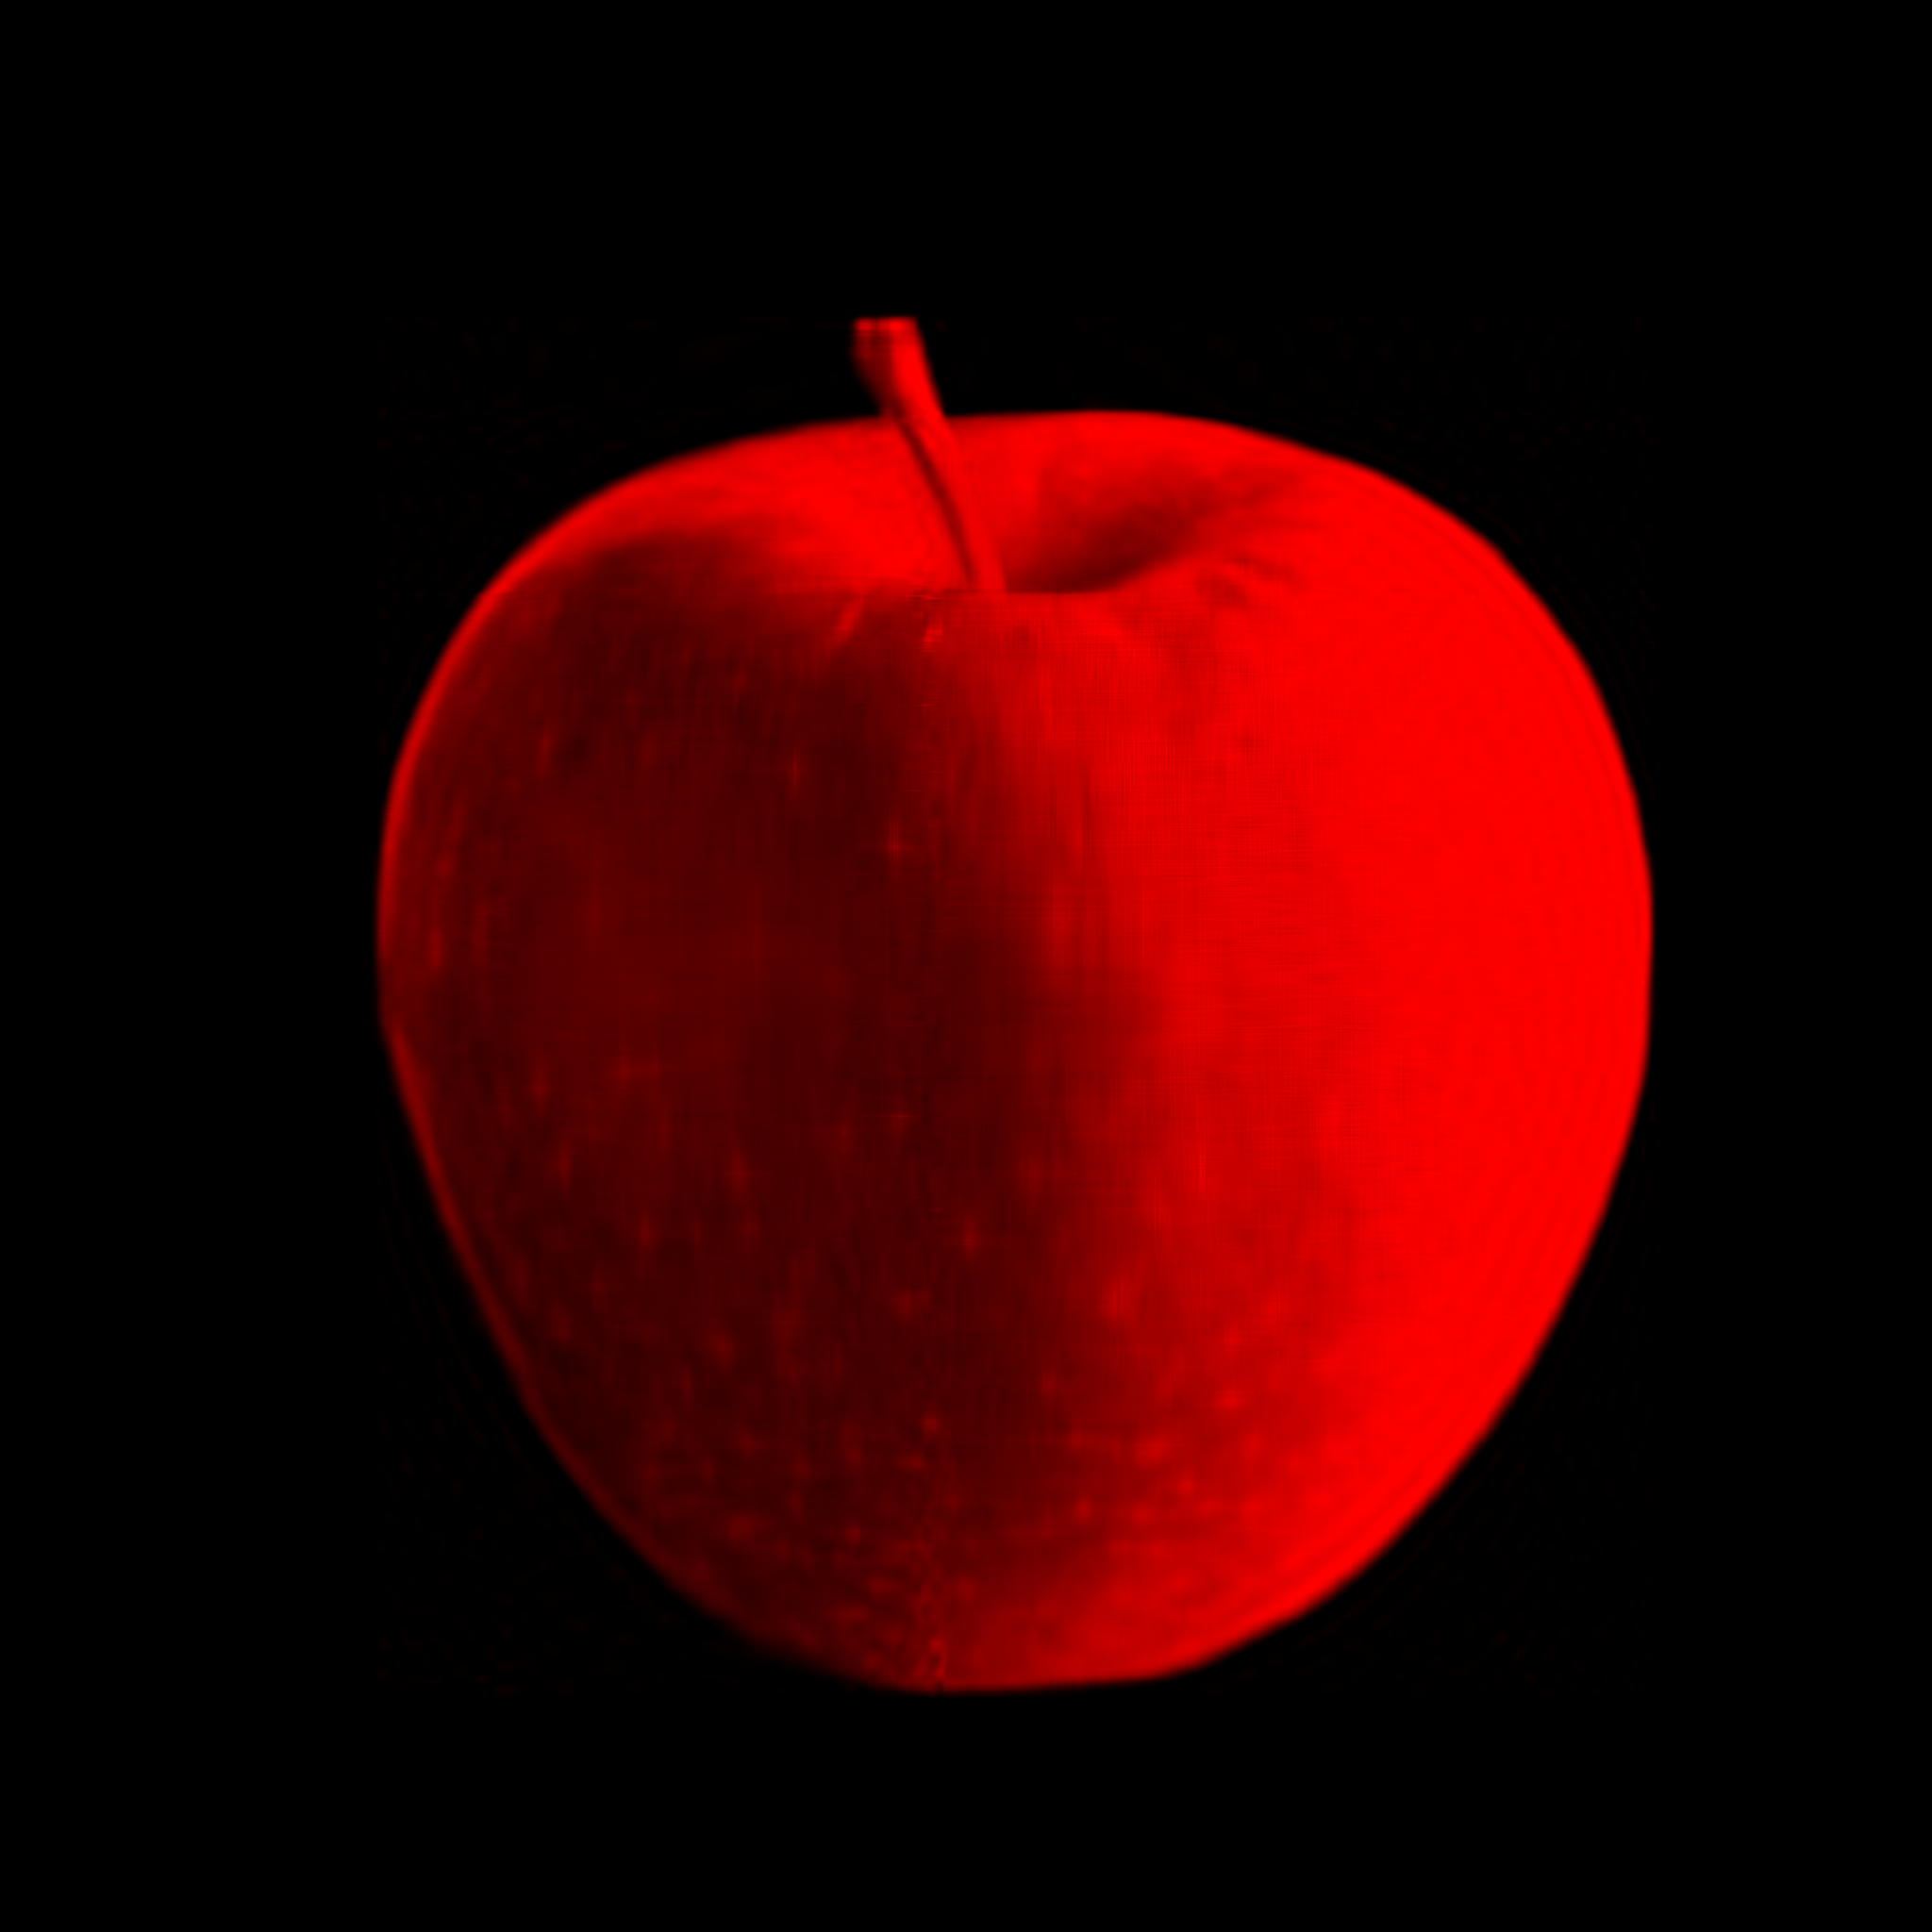

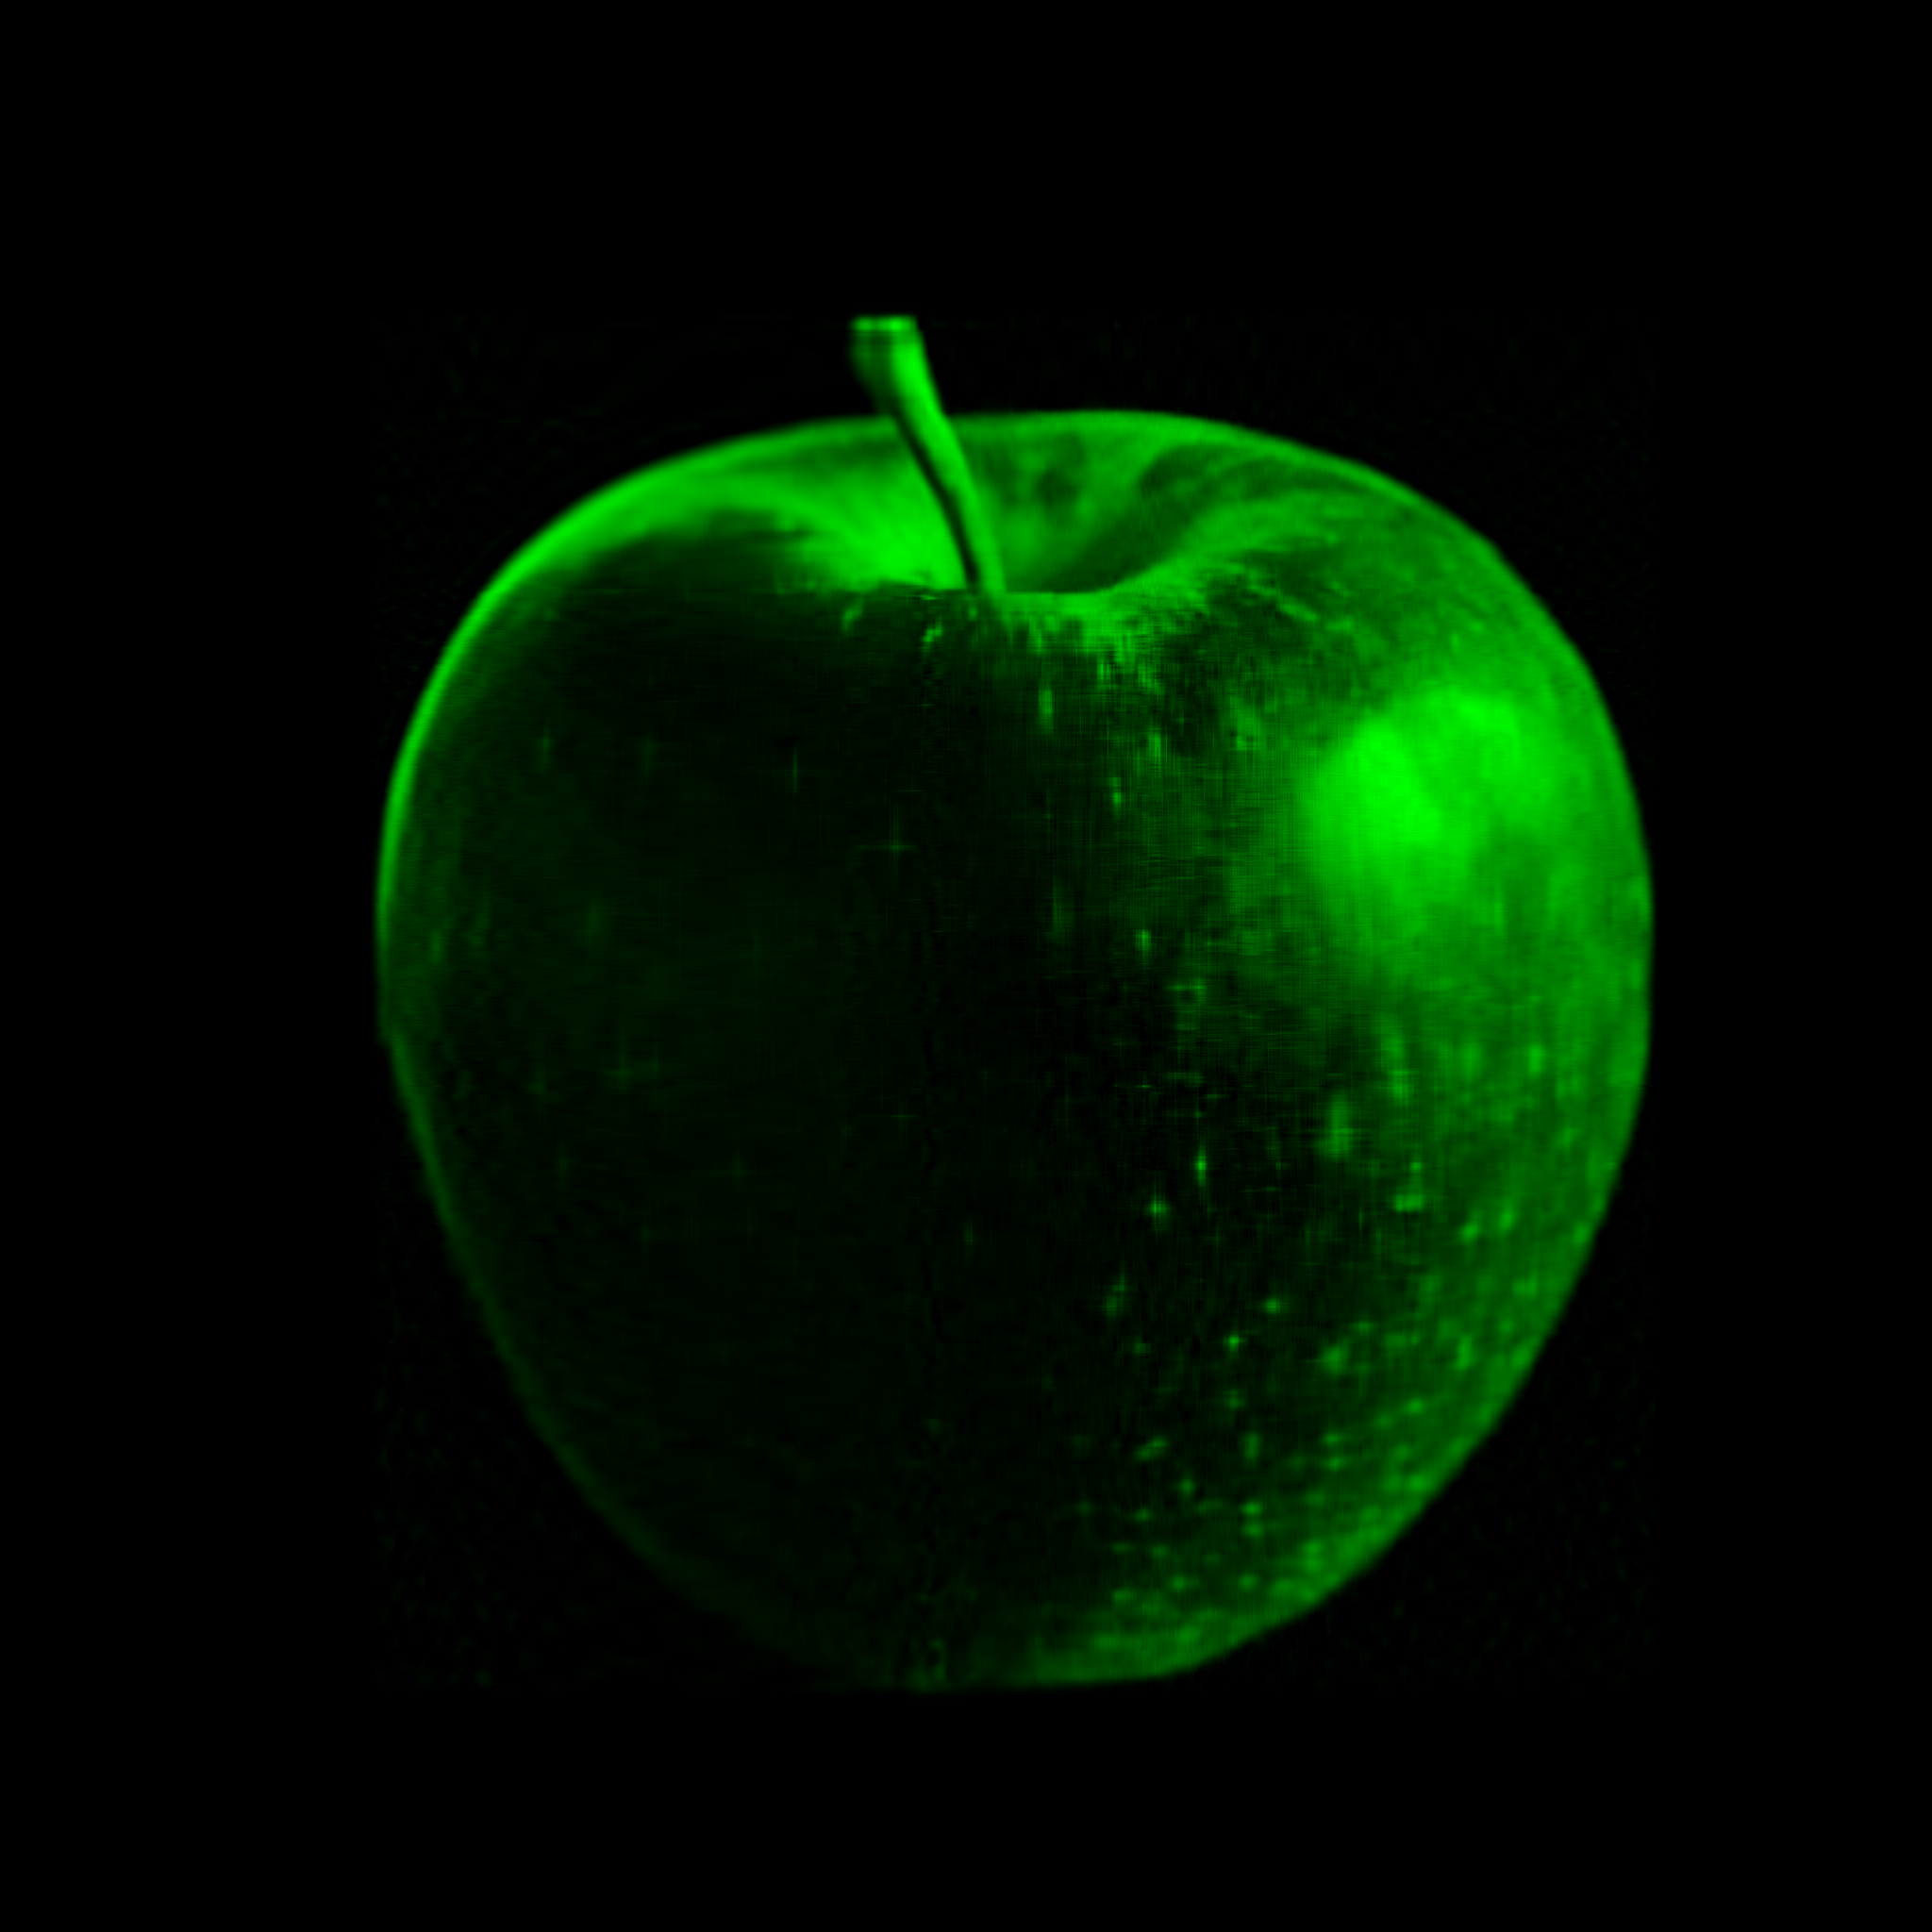

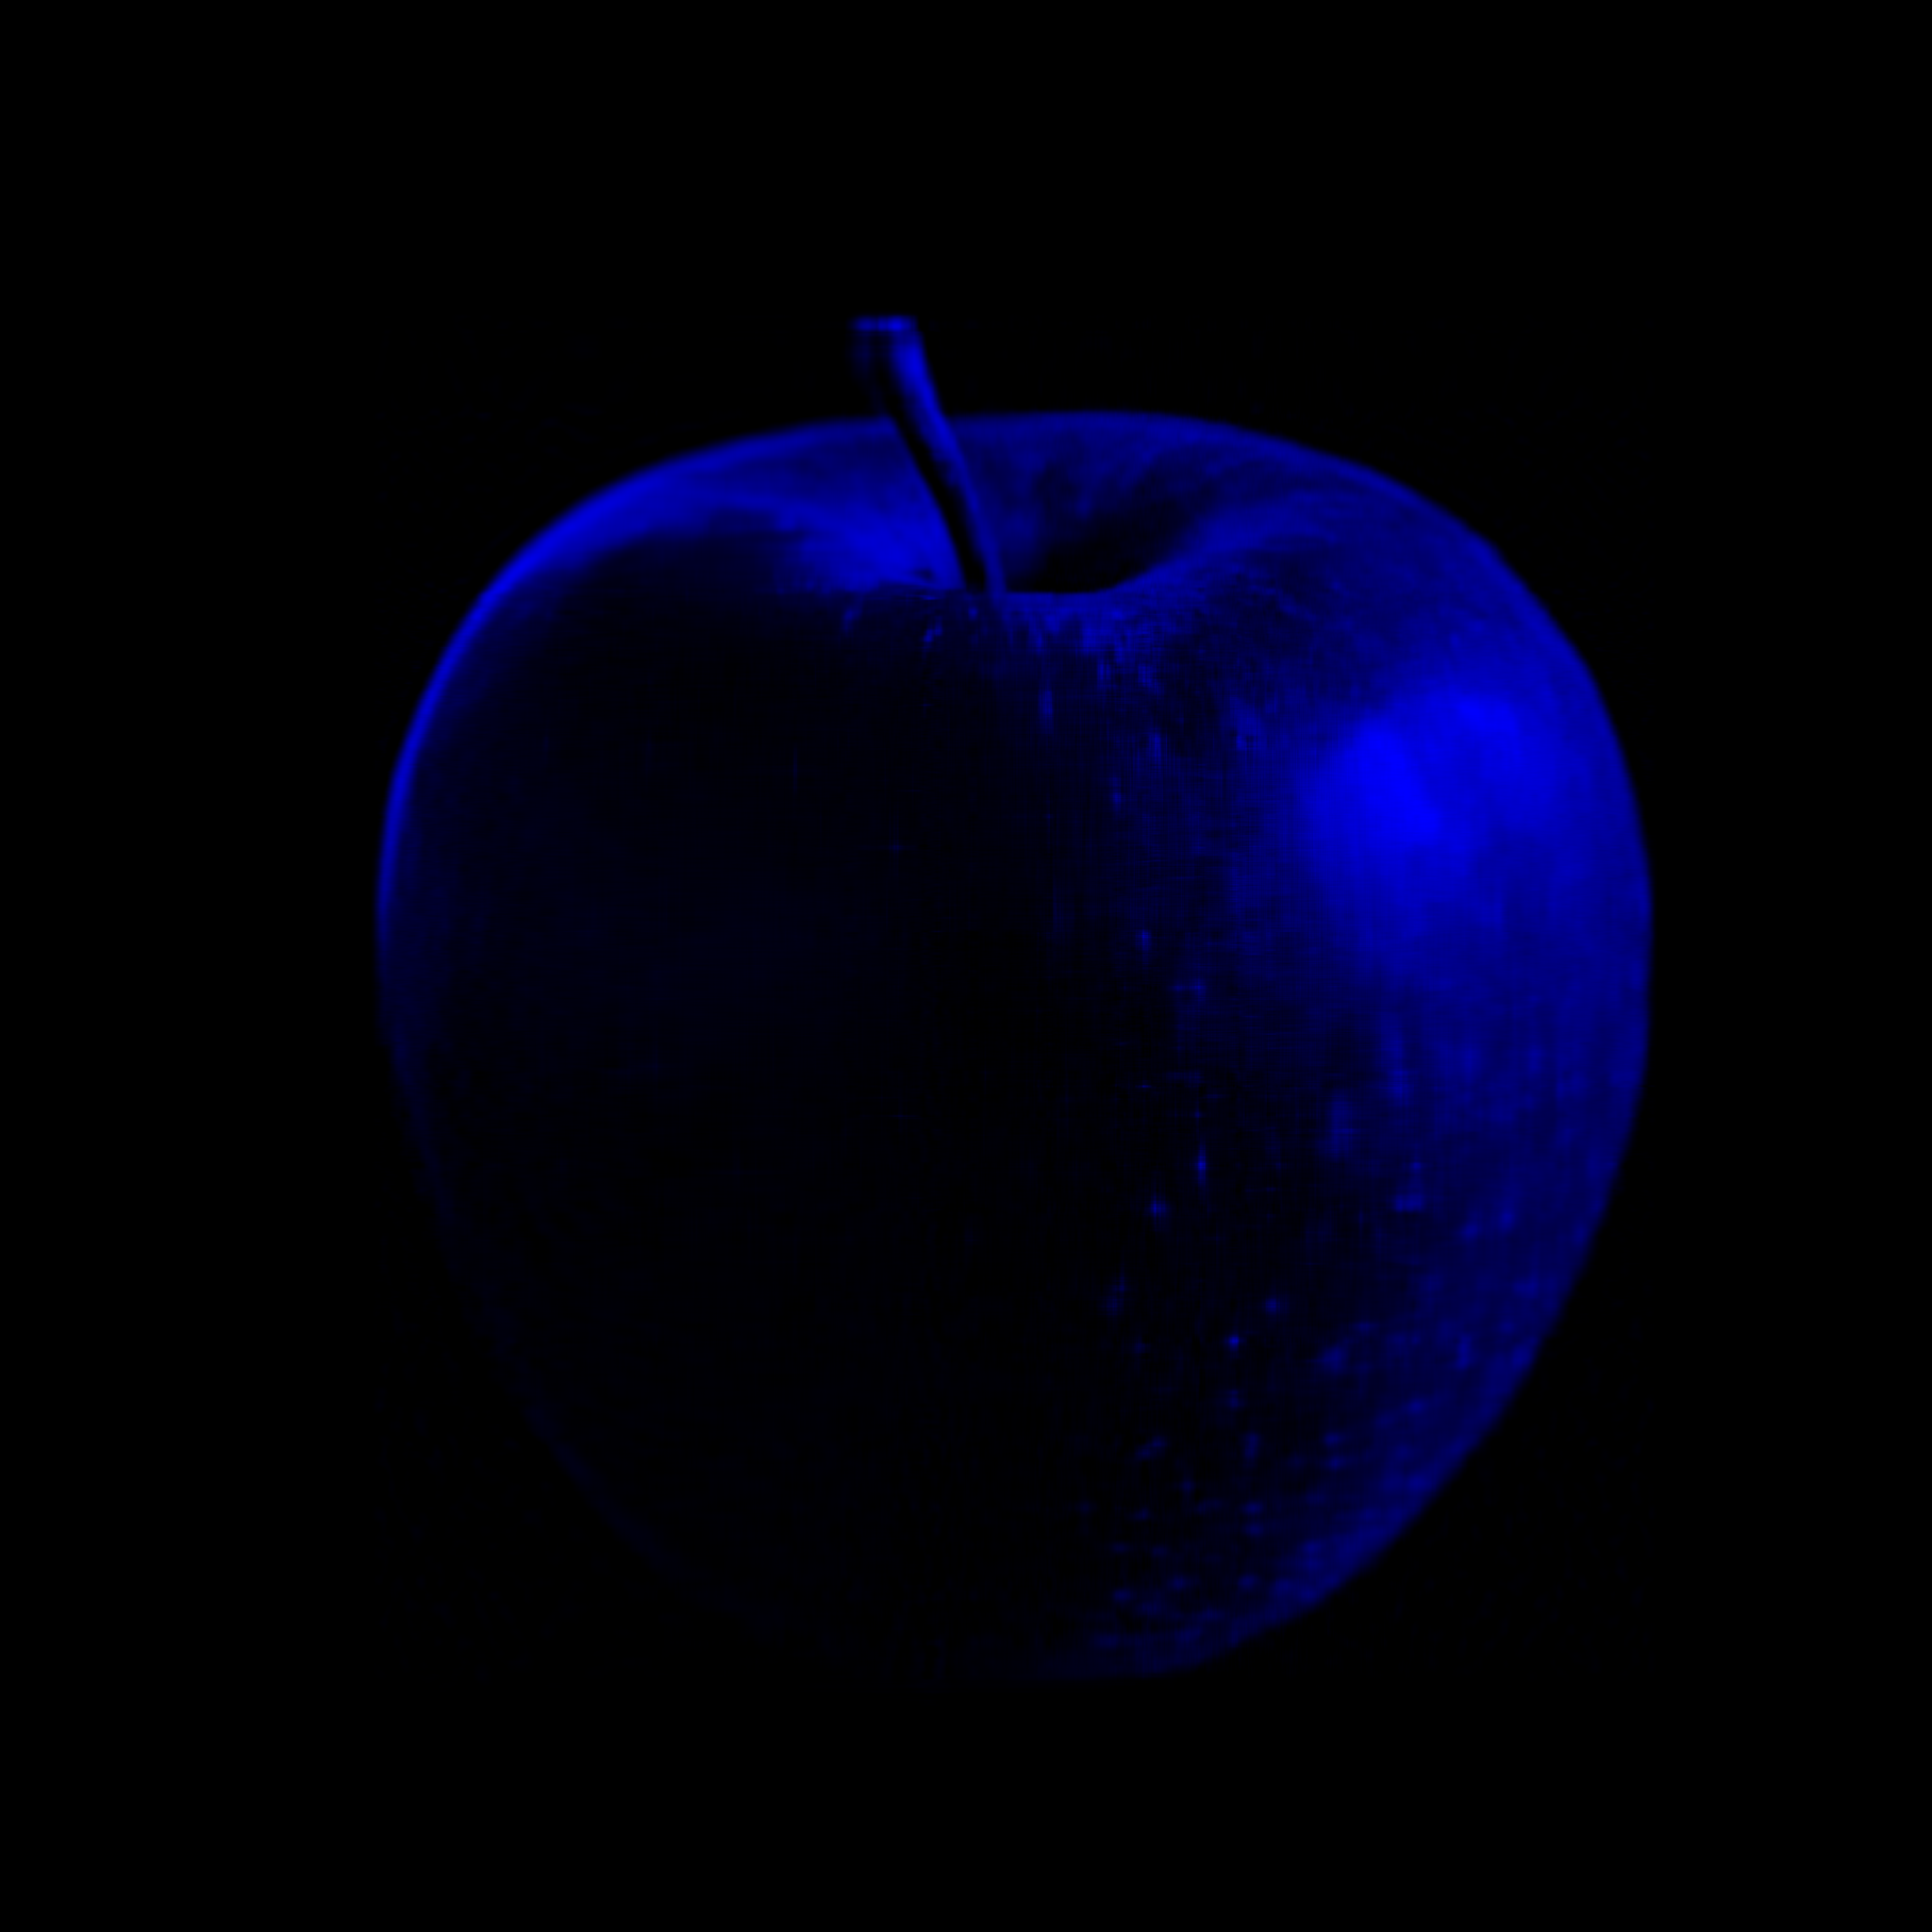

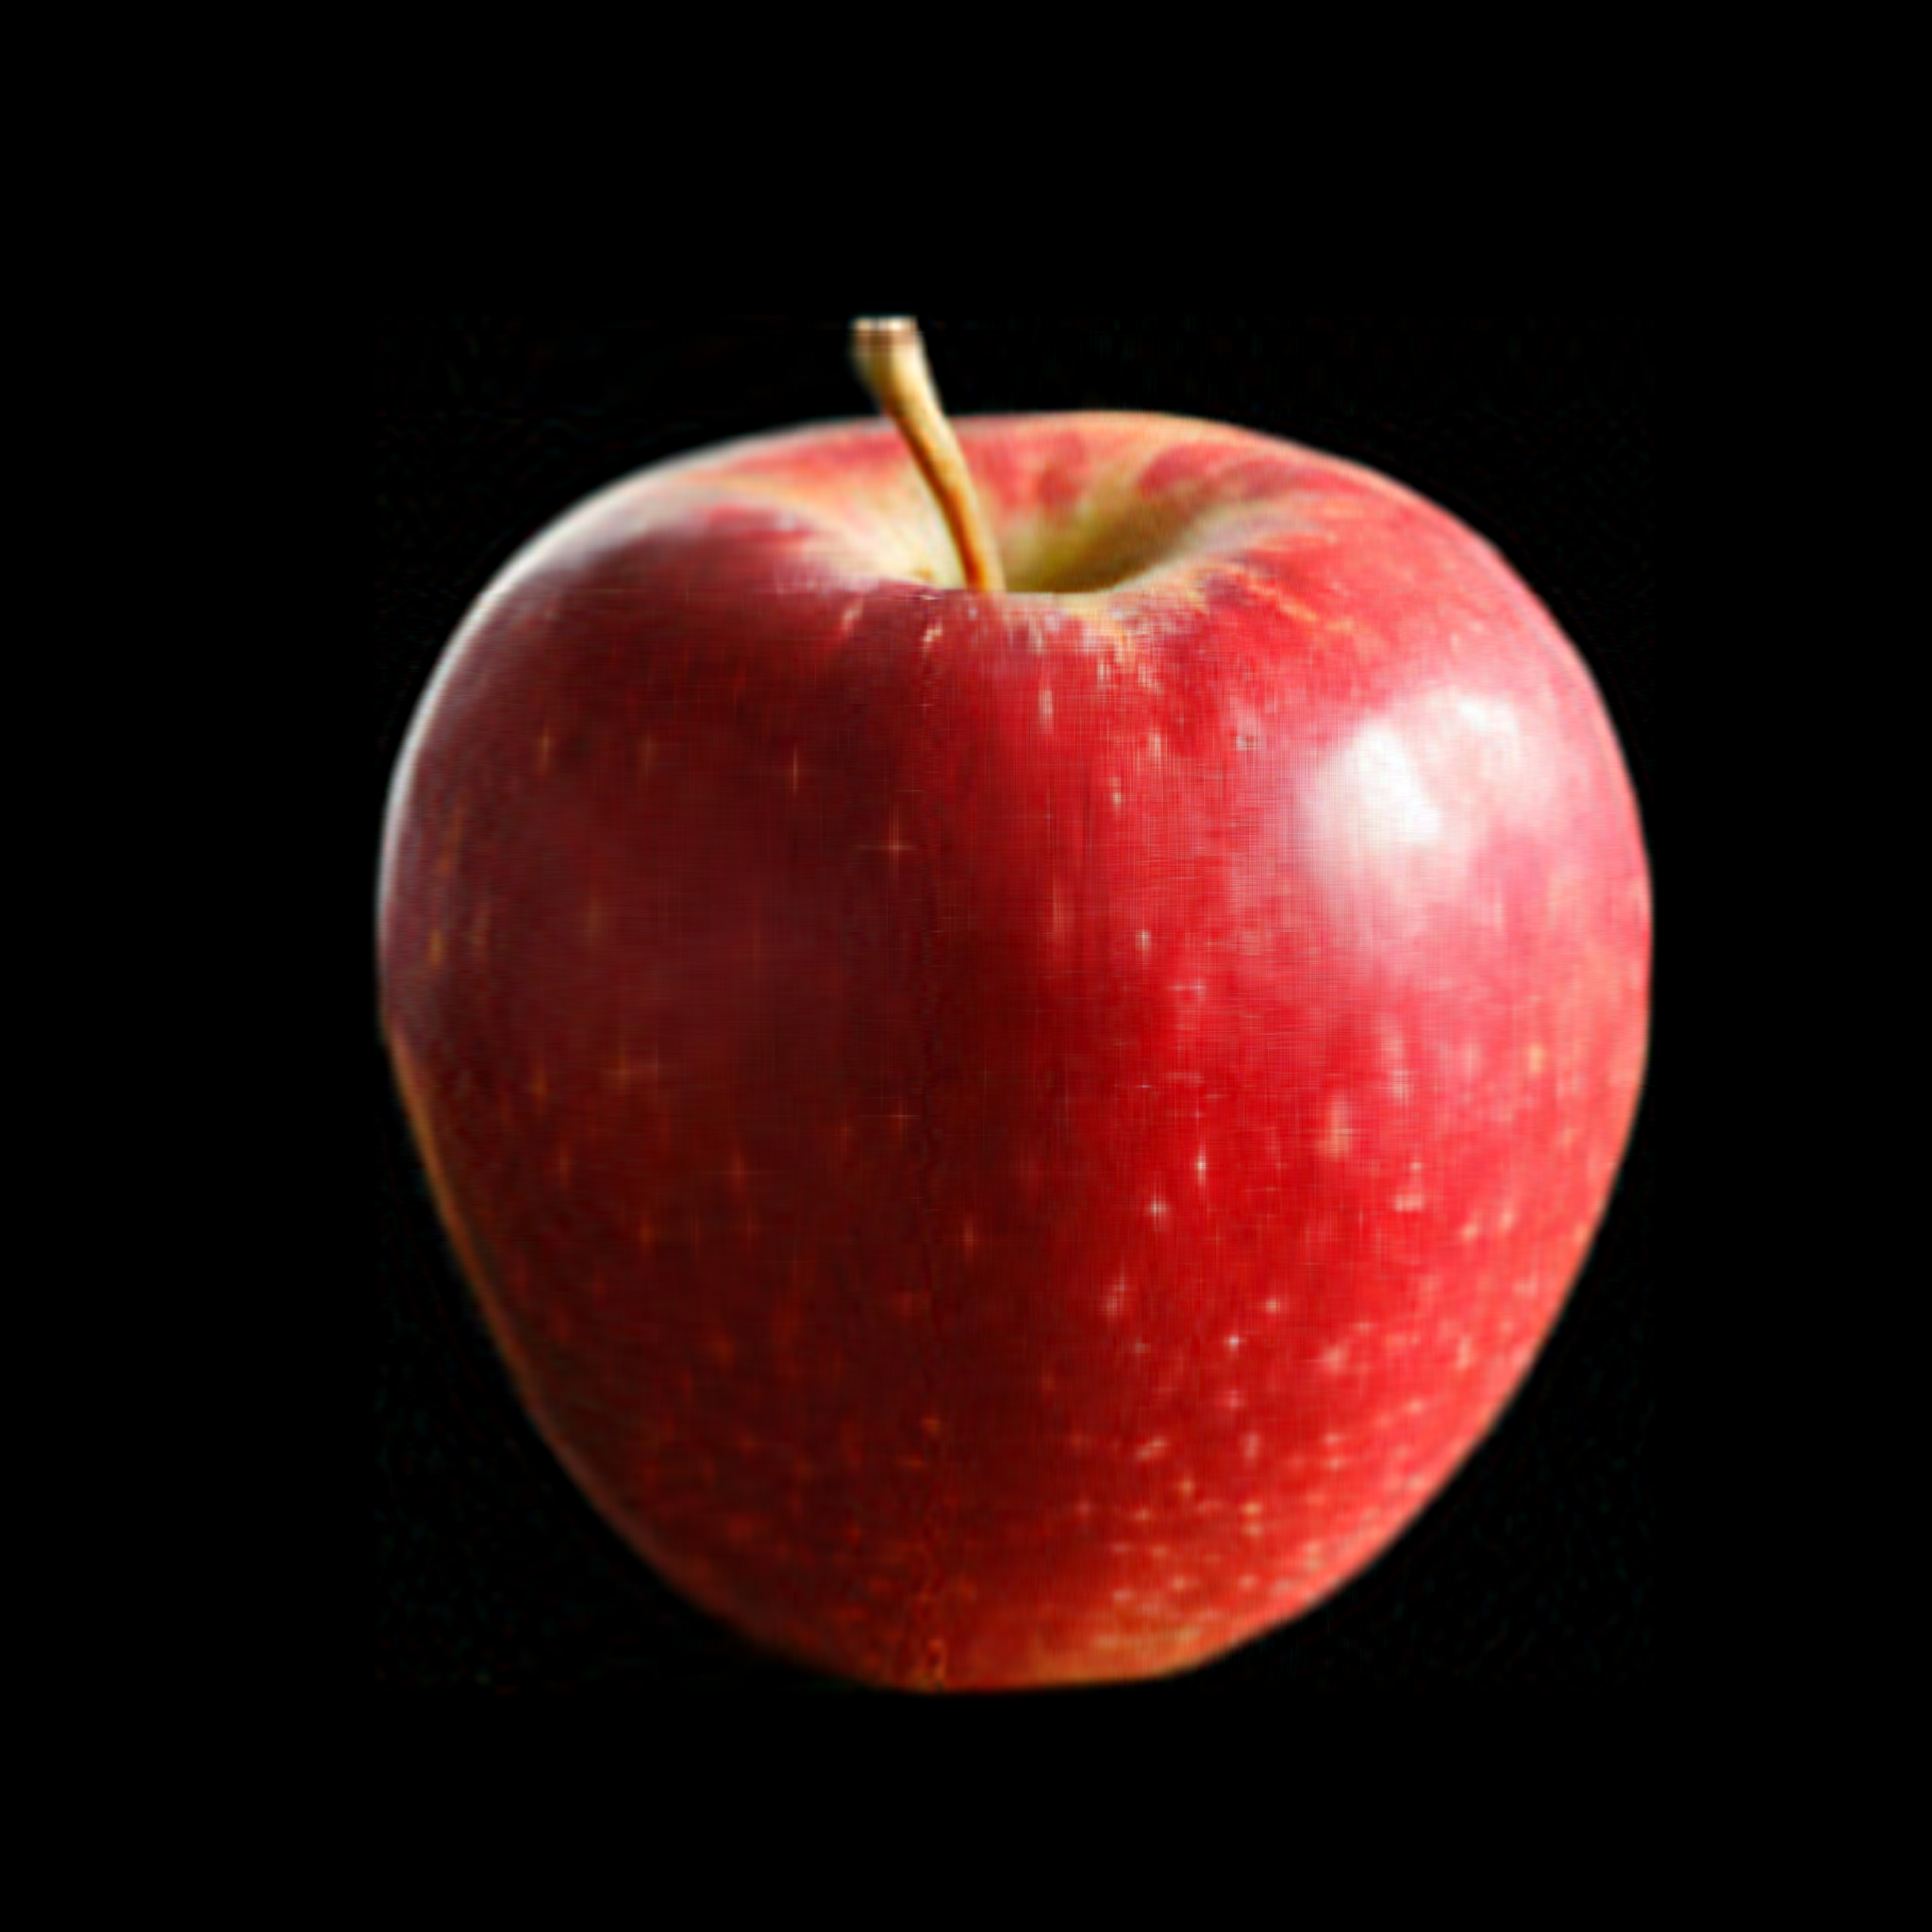

In [10]:
import random, math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

k = math.floor(random.random()*119)
print(k)

# original_arr, data = svd(np.asarray(Image.open('Processed/Real/3.jpg'))[(2240-2048)//2: (2240+2048)//2, (3984-2048)//2: (3984+2048)//2], 48)
# original_arr, data = svd(np.asarray(Image.open('Processed/Ai/1.jpg')), 512)
# img48 = Image.fromarray(clamp(original_arr).astype('uint8'), 'RGB')
# display(img48)

arr = [0, 0, 0]
for i in range(3):
    u = df.iloc[k][4097*48*i: 4097*48*i + 2048*48].to_numpy().reshape([2048, 48])
    s = np.diag(df.iloc[k][4097*48*i + 2048*48: 4097*48*i + 2049*48].to_numpy())
    v = df.iloc[k][4097*48*i + 2049*48: 4097*48*i + 4097*48].to_numpy().reshape([48, 2048])
    arr[i] = u @ s @ v

temp_arr = clamp(np.array([[x, 0, 0] for x, y, z in zip(arr[0].flatten(), arr[1].flatten(), arr[2].flatten())])).reshape([2048, 2048, 3]).astype('uint8')
img = Image.fromarray(temp_arr, 'RGB')
display(img)
temp_arr = clamp(np.array([[0, y, 0] for x, y, z in zip(arr[0].flatten(), arr[1].flatten(), arr[2].flatten())])).reshape([2048, 2048, 3]).astype('uint8')
img = Image.fromarray(temp_arr, 'RGB')
display(img)
temp_arr = clamp(np.array([[0, 0, z] for x, y, z in zip(arr[0].flatten(), arr[1].flatten(), arr[2].flatten())])).reshape([2048, 2048, 3]).astype('uint8')
img = Image.fromarray(temp_arr, 'RGB')
display(img)
temp_arr = clamp(np.array([[x, y, z] for x, y, z in zip(arr[0].flatten(), arr[1].flatten(), arr[2].flatten())])).reshape([2048, 2048, 3]).astype('uint8')
img = Image.fromarray(temp_arr, 'RGB')
display(img)

In [5]:
from collections import deque 

def remove_noise(a, blob_size = 1000):
    # Do BFS On the Array; If the non-black blob is smaller than blob_size, remove it.
    visited = [[False for _ in range(2048)] for _ in range(2048)]
    for i in range(2048):
        for j in range(2048):
            if(a[i][j] != [0, 0, 0] and not visited[i][j]):
                blob = []
                queue = deque([[i, j]])
                visited[i][j] = True
                while len(queue):
                    px, py = queue.popleft()
                    blob.append([px, py])
                    for dx, dy in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                        cx, cy = px + dx, py + dy
                        if 0 <= cx and cx < 2048 and 0 <= cy and cy < 2048 and a[cx][cy] != [0, 0, 0] and not visited[cx][cy]:
                            queue.append([cx, cy])
                            visited[cx][cy] = True
                if len(blob) < blob_size:
                    for x, y in blob:
                        a[x][y] = [0, 0, 0]
    return a
                    